In [1]:
import sys, time
import numpy as np
import pickle
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from aotools.functions import phaseFromZernikes

sys.path.append(str('/home/travis/Projects'))

from slmOptim.patternSLM import patterns as pt
from slmOptim.optimization.init_experiment import InitExperiment
from slmOptim.optimization.iteration_algorithms import ZernikePolynomials
from slmOptim.patternSLM.patterns import GaussPatternGenerator
from slmOptim.optimization import cost_functions

### Define parameters

In [5]:
# Define observation window on camera
roi_size = 400
off = (-20, 0 )

# Define camera macropixel, this is defined by the measured speckel grain
bins = 1

# Define camera acquisition parameters
exposure_time = 150
gain = 1
timeout= 100

### Initialize experiment 
#### camera and slm

In [6]:
init = InitExperiment(roi_size, off, bins, exposure_time, gain, timeout)
camera = init.init_cam()
slm = init.init_slm()

Connected to 10.42.0.234 on 9999


check the mode to optimize

(404, 404)


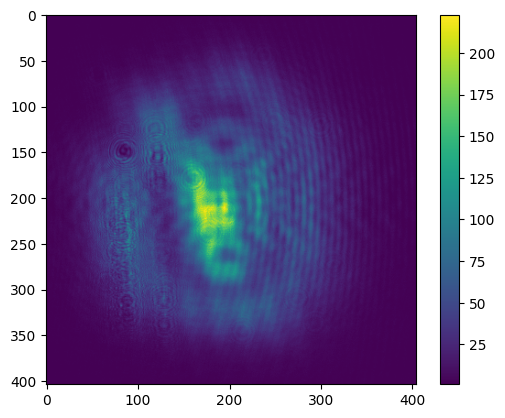

In [7]:
frame = camera.get_pending_frame_or_null()
frame = np.copy(frame.image_buffer)
plt.imshow(frame)
plt.colorbar()

print(frame.shape)

# init.close_cam()
# 

#### Define cost function
Two cost functions are tested. One maximises the energy on a given circle on the frame and one maximized the correlation coefficient between the frame and a (gaussian) target spot. 

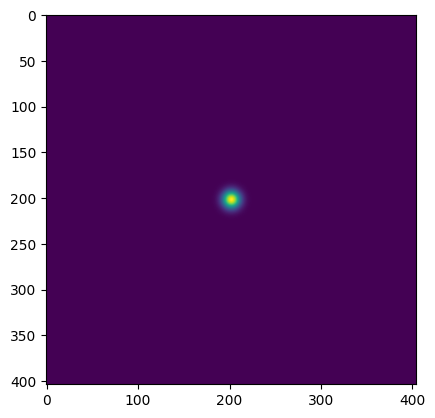

In [4]:
# define cost function and pass it to the object
cost_fun = lambda x: cost_functions.snr(x, 5, (-1, -2))
gauss = GaussPatternGenerator(N=404, w0=.5e-3) 
amp, _ = gauss[0]
cost_fun = lambda x: cost_functions.corr_coef(x, amp)

plt.imshow(amp)

#### Optimize

In [15]:
# define how many polynomials to optimize
num = 100

# instantiate zernike class
zern = ZernikePolynomials(slm, 
                           camera,
                           num_of_zernike_coeffs=num, 
                           slm_calibration_pixel=112)

# pass cost function to object
zern.register_callback(cost_fun)

# run algorithm
mask, coeffs, cost, frames = zern.run((-1.5, 2, 0.5))

# load optimized mask to SLM
slm.sendArray(mask)

  0%|          | 0/100 [00:00<?, ?it/s]

Error. Data not transmitted
Wrong image size?
Retrying
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 0:   1%|          | 1/100 [00:23<38:47, 23.51s/it, Cost=0.379]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 1:   2%|▏         | 2/100 [00:46<38:12, 23.39s/it, Cost=0.184]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 2:   3%|▎         | 3/100 [01:10<38:06, 23.57s/it, Cost=0.187]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 3:   4%|▍         | 4/100 [01:33<37:32, 23.47s/it, Cost=0.268]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 4:   5%|▌         | 5/100 [01:57<37:18, 23.57s/it, Cost=0.272]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 5:   6%|▌         | 6/100 [02:21<36:55, 23.57s/it, Cost=0.267]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 6:   7%|▋         | 7/100 [02:44<36:29, 23.55s/it, Cost=0.276]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 7:   8%|▊         | 8/100 [03:08<36:00, 23.48s/it, Cost=0.286]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 8:   9%|▉         | 9/100 [03:31<35:31, 23.43s/it, Cost=0.287]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 9:  10%|█         | 10/100 [03:54<35:01, 23.35s/it, Cost=0.296]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 10:  11%|█         | 11/100 [04:17<34:33, 23.30s/it, Cost=0.373]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 11:  12%|█▏        | 12/100 [04:41<34:14, 23.34s/it, Cost=0.481]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 12:  13%|█▎        | 13/100 [05:04<33:55, 23.40s/it, Cost=0.483]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 13:  14%|█▍        | 14/100 [05:27<33:29, 23.36s/it, Cost=0.453]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 14:  15%|█▌        | 15/100 [05:51<33:06, 23.37s/it, Cost=0.477]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 15:  16%|█▌        | 16/100 [06:14<32:48, 23.44s/it, Cost=0.348]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 16:  17%|█▋        | 17/100 [06:38<32:21, 23.40s/it, Cost=0.474]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 17:  18%|█▊        | 18/100 [07:01<32:02, 23.44s/it, Cost=0.398]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 18:  19%|█▉        | 19/100 [07:25<31:35, 23.40s/it, Cost=0.398]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 19:  20%|██        | 20/100 [07:48<31:11, 23.39s/it, Cost=0.377]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 20:  21%|██        | 21/100 [08:11<30:43, 23.33s/it, Cost=0.388]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 21:  22%|██▏       | 22/100 [08:35<30:21, 23.36s/it, Cost=0.386]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 22:  23%|██▎       | 23/100 [08:58<30:06, 23.46s/it, Cost=0.445]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 23:  24%|██▍       | 24/100 [09:22<29:56, 23.64s/it, Cost=0.489]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 24:  25%|██▌       | 25/100 [09:47<29:49, 23.86s/it, Cost=0.495]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 25:  26%|██▌       | 26/100 [10:10<29:16, 23.74s/it, Cost=0.485]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 26:  27%|██▋       | 27/100 [10:33<28:41, 23.58s/it, Cost=0.486]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 27:  28%|██▊       | 28/100 [10:57<28:10, 23.48s/it, Cost=0.49] 

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 28:  29%|██▉       | 29/100 [11:20<27:42, 23.42s/it, Cost=0.661]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 29:  30%|███       | 30/100 [11:43<27:19, 23.43s/it, Cost=0.496]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 30:  31%|███       | 31/100 [12:07<26:53, 23.38s/it, Cost=0.608]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 31:  32%|███▏      | 32/100 [12:30<26:28, 23.36s/it, Cost=0.599]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 32:  33%|███▎      | 33/100 [12:53<26:04, 23.35s/it, Cost=0.637]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 33:  34%|███▍      | 34/100 [13:17<25:44, 23.41s/it, Cost=0.644]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 34:  35%|███▌      | 35/100 [13:41<25:29, 23.52s/it, Cost=0.629]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 35:  36%|███▌      | 36/100 [14:05<25:31, 23.92s/it, Cost=0.634]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 36:  37%|███▋      | 37/100 [14:30<25:26, 24.23s/it, Cost=0.706]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 37:  38%|███▊      | 38/100 [14:55<25:13, 24.41s/it, Cost=0.339]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 38:  39%|███▉      | 39/100 [15:20<25:00, 24.60s/it, Cost=0.357]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 39:  40%|████      | 40/100 [15:45<24:46, 24.78s/it, Cost=0.414]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 40:  41%|████      | 41/100 [16:10<24:18, 24.72s/it, Cost=0.402]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 41:  42%|████▏     | 42/100 [16:35<23:53, 24.72s/it, Cost=0.426]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 42:  43%|████▎     | 43/100 [16:59<23:19, 24.56s/it, Cost=0.493]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 43:  44%|████▍     | 44/100 [17:22<22:34, 24.18s/it, Cost=0.497]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 44:  45%|████▌     | 45/100 [17:46<21:54, 23.91s/it, Cost=0.501]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 45:  46%|████▌     | 46/100 [18:09<21:25, 23.81s/it, Cost=0.354]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 46:  47%|████▋     | 47/100 [18:33<20:59, 23.76s/it, Cost=0.502]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 47:  48%|████▊     | 48/100 [18:56<20:31, 23.68s/it, Cost=0.0679]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 48:  49%|████▉     | 49/100 [19:21<20:23, 23.98s/it, Cost=0.0786]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 49:  50%|█████     | 50/100 [19:46<20:10, 24.20s/it, Cost=0.0771]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 50:  51%|█████     | 51/100 [20:10<19:53, 24.36s/it, Cost=0.116] 

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 51:  52%|█████▏    | 52/100 [20:35<19:31, 24.41s/it, Cost=0.103]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 52:  53%|█████▎    | 53/100 [21:00<19:13, 24.54s/it, Cost=0.123]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 53:  54%|█████▍    | 54/100 [21:25<18:54, 24.67s/it, Cost=0.119]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 54:  55%|█████▌    | 55/100 [21:49<18:25, 24.57s/it, Cost=0.122]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 55:  56%|█████▌    | 56/100 [22:13<17:49, 24.30s/it, Cost=0.124]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 56:  57%|█████▋    | 57/100 [22:36<17:16, 24.10s/it, Cost=0.109]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 57:  58%|█████▊    | 58/100 [23:00<16:43, 23.90s/it, Cost=0.308]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 58:  59%|█████▉    | 59/100 [23:24<16:17, 23.84s/it, Cost=0.234]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 59:  60%|██████    | 60/100 [23:47<15:54, 23.86s/it, Cost=0.298]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 60:  61%|██████    | 61/100 [24:11<15:30, 23.85s/it, Cost=0.28] 

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 61:  62%|██████▏   | 62/100 [24:35<15:05, 23.84s/it, Cost=0.285]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 62:  63%|██████▎   | 63/100 [24:59<14:42, 23.84s/it, Cost=0.298]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 63:  64%|██████▍   | 64/100 [25:23<14:16, 23.79s/it, Cost=0.287]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 64:  65%|██████▌   | 65/100 [25:46<13:52, 23.79s/it, Cost=0.289]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 65:  66%|██████▌   | 66/100 [26:11<13:40, 24.13s/it, Cost=0.289]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 66:  67%|██████▋   | 67/100 [26:35<13:15, 24.11s/it, Cost=0.289]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 67:  68%|██████▊   | 68/100 [26:59<12:46, 23.95s/it, Cost=0.325]

Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted
Data transmitted


Iteration #: 68:  69%|██████▉   | 69/100 [27:23<12:25, 24.04s/it, Cost=0.268]

Data transmitted
Data transmitted
Data transmitted


Iteration #: 68:  69%|██████▉   | 69/100 [27:30<12:21, 23.92s/it, Cost=0.268]


KeyboardInterrupt: 

### Do some plotting and save

In [ ]:
with open('optimize_aberrations.pkl', 'wb') as fp:
    pickle.dump((mask, coeffs, cost, frames), fp)

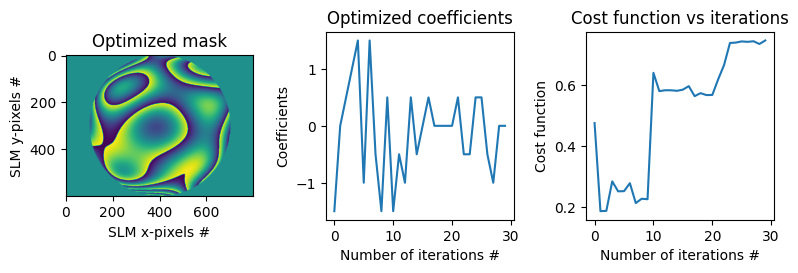

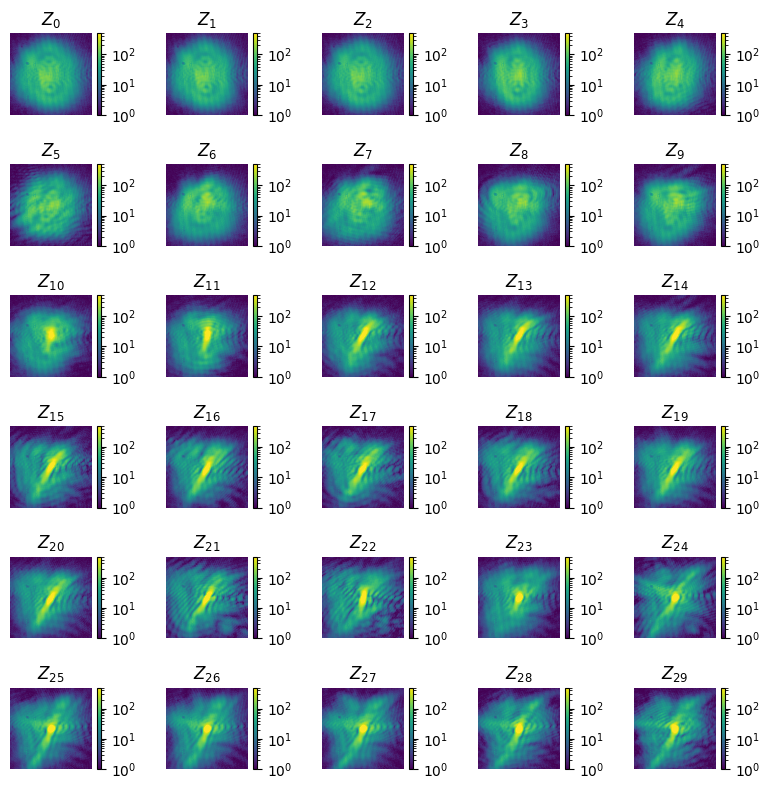

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
axs[0].imshow(mask)
axs[0].set_title("Optimized mask")
axs[0].set_xlabel("SLM x-pixels #")
axs[0].set_ylabel("SLM y-pixels #")


axs[1].plot(coeffs)
axs[1].set_title("Optimized coefficients")
axs[1].set_xlabel("Number of iterations #")
axs[1].set_ylabel("Coefficients")
axs[1].set_box_aspect(1)


axs[2].plot(cost)
axs[2].set_title("Cost function vs iterations")
axs[2].set_xlabel("Number of iterations #")
axs[2].set_ylabel("Cost function")
axs[2].set_box_aspect(1)

fig.tight_layout()
# plt.savefig("optimize_aberrations1.png", dpi=400, transparent=True)


fig, axs = plt.subplots(nrows=int(6), ncols=int(5), figsize=(8, 8))
count = 0
for matrix, ax in zip(frames[1].values(), axs.ravel()):
    im = ax.imshow(matrix, norm=LogNorm(vmin=1, vmax=500))
    # im = ax.imshow(matrix, vmin=1, vmax=500)
    ax.axis('off')
    ax.set_title(r"$Z_{%d}$" %count)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax)
    count += 1
fig.tight_layout()

# plt.savefig("optimize_aberrations2.png", dpi=400, transparent=True)


# fig, axs = plt.subplots(nrows=int(10), ncols=int(2), figsize=(30, 5))
# count = 0
# for matrix, ax in zip(frames[0].values(), axs.ravel()):
#     im = ax.imshow(matrix, vmin=0, vmax=112)
#     ax.axis('off')
#     ax.set_title(r"$Z_{%d}$" %count)
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)
#     fig.colorbar(im, cax=cax)
#     count += 1
# fig.tight_layout()

# plt.savefig("optimize_aberrations3.png", dpi=400, transparent=True)

    

In [ ]:
import pandas as pd
mask = pd.DataFrame(mask)
mask.to_csv('mask2.csv', header=False, index=False)

In [ ]:
df = pd.read_csv('mask.csv', header=None)
mask = df.to_numpy()
plt.imshow(mask)


#### efforts to do the same thing but with LG modes - in progress

In [ ]:
shape = (600, 800)
radius = 300
center = [600 // 2, 800 // 2]

gauss = GaussPatternGenerator(N=2*radius, num=16, w0=1e-2, LG=True)

In [ ]:



def get_disk_mask(radius, center = None):
    '''
    Generate a binary mask with value 1 inside a disk, 0 elsewhere
    :param shape: list of integer, shape of the returned array
    :radius: integer, radius of the disk
    :center: list of integers, position of the centerfrom aotools.functions import phaseFromZernikes

    :return: numpy array, the resulting binary mask
    '''
    shape = [2 * radius] * 2
    if not center:
        center = (shape[0] // 2, shape[1] // 2)
    X, Y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]))
    mask = (Y - center[0]) ** 2 + (X - center[1]) ** 2 < radius ** 2
    
    return mask.astype('bool')

def phaseFromGauss(gCoeffs, radius):

    mask = np.zeros((radius, radius))
    for idx in range(len(gCoeffs)):
        amp, phase = gauss[idx]
        mask += phase * gCoeffs[idx]
        
    return mask

def phase2SLM(mask):
    mask2pi = mask% 2 * np.pi
    # scale phase between 0 and 2pi
    # arg2pi = (arg + 2 * np.pi) % (2 * np.pi)
    # normalize to SLM 2pi calibration value
    mask2SLM = mask2pi * 112 / (2 * np.pi) 
    
    return mask2SLM.astype('uint8')
    
def complex_mask_from_gauss_coeff(vec, shape, radius, center):
    '''
    Generate a complex phase mask from a vector containting the coefficient of the first Zernike polynoms.
    :param DMD_resolution: list of integers, contains the resolution of the DMD, e.g. [1920,1200]
    :param: integer, radius of the illumination disk on the DMD
    :center: list of integers, contains the position of the center of the illumination disk
    :center: list of float, the coefficient of the first Zernike polynoms
    '''
    
# Generate a complex phase mask from the coefficients
    zern_mask = phaseFromGauss(vec, 2 * radius)
    print(zern_mask.shape)
    
    # We want the amplitude to be 0 outside the disk, we fist generate a binary disk mask
    amp_mask = get_disk_mask(radius)
    print(amp_mask.shape)
    
    # put the Zernik mask at the right position and multiply by the disk mask
    mask = np.zeros(shape = shape, dtype='uint8')
    mask[center[0] - radius:center[0] + radius,
         center[1] - radius:center[1] + radius] = zern_mask * amp_mask
    
    return mask

# amp_mask = complex_mask_from_gauss_coeff([1, 2])
# plt.imshow(abs(amp_mask))

# mask = get_disk_mask(radius)
# plt.imshow(mask)

g = phaseFromGauss([1, 1, 1], 2 * radius)
plt.figure()
plt.imshow(g)

mask2 = complex_mask_from_gauss_coeff([1, 2, 1, 1, 1, 1, 1,1 , 1], shape, radius, center)
mask2 = phase2SLM(mask2)
# plt.figure()
plt.imshow(mask2)
plt.colorbar()

In [ ]:
from aotools.functions import phaseFromZernikes
import matplotlib.pyplot as plt
from slmOptim.patternSLM.patterns import GaussPatternGenerator

vec = [1, 1, 0, 0]
radius = 100

gauss = GaussPatternGenerator(N=2*radius, num=16, w0=1e-2, LG=True)

def phaseFromGauss(gCoeffs, radius):

    mask = np.zeros((radius, radius))
    for idx in range(len(gCoeffs)):
        amp, phase = gauss[idx]
        mask += phase * gCoeffs[idx]
        
    return mask

zern = phaseFromZernikes(vec, 2 * radius)

plt.figure()
plt.imshow(zern)
plt.colorbar()

g = phaseFromGauss(vec, 2 * radius)

plt.figure()
plt.imshow(g)
plt.colorbar()


In [ ]:
vec = [1, 1, 1, 1, 1, 1, 1]
g = phaseFromGauss(vec, 2 * radius)
plt.imshow(g )
plt.colorbar()

In [ ]:
im1 = gauss[0][0]
im2 = gauss[1][0]

In [ ]:
plt.imshow(im1)
plt.colorbar()

In [ ]:
had = pt.HadamardPatternGenerator(256, 112)

pattern = had[150]
patternSLM = pt.Pattern(800, 600)

mask = patternSLM._enlarge_pattern(pattern, 5)
mask = patternSLM.add_subpattern(mask)

slm.sendArray(mask)